## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [28]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128], drop_rate=0.2, l1_l2ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                 activation='relu',
                                 name="hidden"+str(i+1))(input_layer)
            x = Dropout(drop_rate)(x)
#             x = BatchNormalization()(x)
            
        else:
            x = keras.layers.Dense(units=n_units,
                                 activation='relu',
                                 name="hidden"+str(i+1))(x)
            x = Dropout(drop_rate)(x)
#             x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units,
                           activation='softmax',
                           name="output")(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    
    return model

In [29]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCH = 50
BATCH_SIZE = 64
MOMENTUM = 0.9

In [30]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train,
         epochs=EPOCH,
         batch_size=BATCH_SIZE,
         validation_data=(x_test,y_test),
         shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.1364 - accuracy: 0.2012 - val_loss: 1.9237 - val_accuracy: 0.3074
Epoch 2/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.9406 - accuracy: 0.2888 - val_loss: 1.8073 - val_accuracy: 0.3589
Epoch 3/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.8552 - accuracy: 0.3257 - val_loss: 1.7428 - val_accuracy: 0.3763
Epoch 4/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7972 - accuracy: 0.3505 - val_loss: 1.6839 - val_accuracy: 0.3958
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7509 - accuracy: 0.3700 - val_loss: 1.6359 - val_accuracy: 0.4178
Epoch 6/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.7117 - accuracy: 0.3856 - val_loss: 1.5998 - val_accuracy: 0.4331
Epoch 7/50
50000/50000 [==============================] - 5s 90us/st

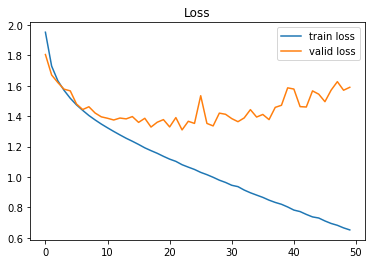

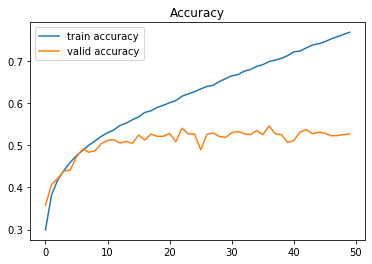

In [27]:
'''

'''

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

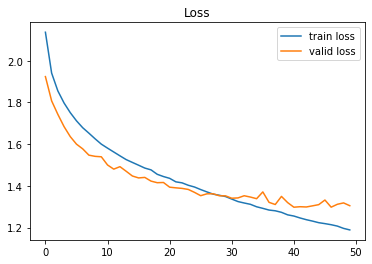

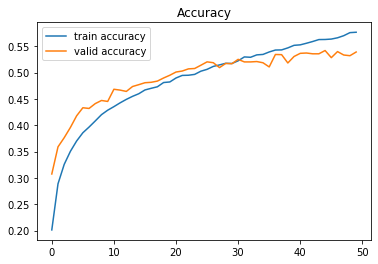

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()